In [517]:
import pandas as pd
from sklearn import svm
import numpy as np
from time import time
import matplotlib.pyplot as plt
import matplotlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import PolynomialFeatures

In [518]:
def get_data_noisysine():
    data = pd.read_csv("datasets/noisysine.csv").values
    points=[]
    for d in data[:, 0] :
        points.append(np.array([d]))
    return np.array(points), data[:, 1]

def get_data_hydrodynamics():
    data = pd.read_csv("datasets/hydrodynamics.csv").values
    points=[]
    for d in data[:, 0:-1] :
        points.append(np.array(d))
    return np.array(points), data[:, -1]


def split_data(points, labels):
    points_train, points_test, labels_train, labels_test = train_test_split(points, labels, train_size=0.8)  
    return points_train, labels_train, points_test,  labels_test

In [519]:
def inv(x, y):
    return np.linalg.inv(np.transpose(x) @ x) @ np.transpose(x) @ y

def h(w, x, degree):
    return PolynomialFeatures(degree=degree).fit_transform(x) @ w
    
def polynomial_regression(points_train, labels_train, points_test,  labels_test,degree):
    points_train_f = PolynomialFeatures(degree=degree).fit_transform(points_train)
    w = inv(points_train_f, labels_train)
    labels_test_n = h(w, points_test, degree)
    score  = 1 - (np.sum((labels_test_n - labels_test) ** 2)) / (np.sum((labels_test - np.mean(labels_test)) ** 2))
    return w, score

In [520]:
def plot(points, labels, w, degree):
    matplotlib.rcParams['figure.figsize'] = [5, 5]
    points_min = points.min() - 1
    points_max = points.max() + 1
    points_n = np.arange(points_min, points_max, 0.02).reshape(-1, 1)
    labels_n = PolynomialFeatures(degree=degree).fit_transform(points_n) @ w
    plt.scatter(points, labels)
    plt.plot(points_n, labels_n, color='blue')
    plt.xticks(())
    plt.yticks(())
    plt.show()

1: 0.3340178574724145


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


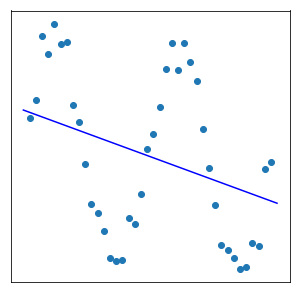

2: 0.33809820295810733


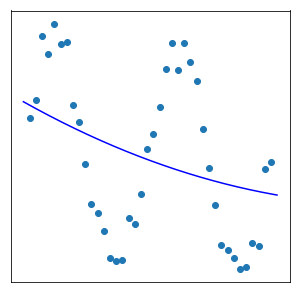

3: 0.21447348407063804


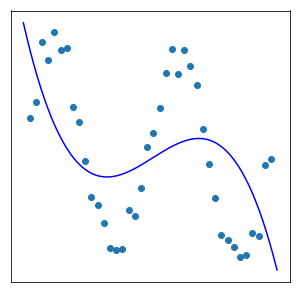

4: 0.16923055653536923


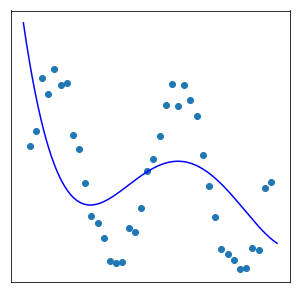

5: 0.9067399335559657


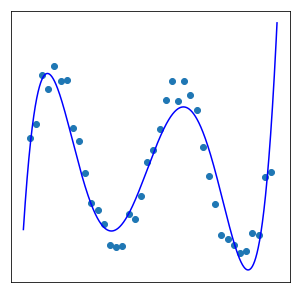

In [521]:
points, labels = get_data_noisysine()
points_train, labels_train, points_test,  labels_test = split_data(points, labels)
for d in [1, 2,3 , 4, 5]:
    w, score= polynomial_regression(points_train, labels_train, points_test,  labels_test, d)
    print(str(d) + ": " + str(score))
    plot(points, labels, w, d)

In [523]:
points, labels = get_data_hydrodynamics()
points_train, labels_train, points_test,  labels_test = split_data(points, labels)
for d in [1, 2]:
    w, score= polynomial_regression(points_train, labels_train, points_test,  labels_test, d)
    print(str(d) + ": " + str(score))



1: 0.6815478373944261
2: 0.9298376966884636


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
